<a href="https://colab.research.google.com/github/Thabby07/richter-predictor/blob/master/TFM_Exploraci%C3%B3n_del_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Urls para el dataset
# https://eq2015.npc.gov.np/#/download
# https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

#TODO Para calcular descriptivos. Ver: https://towardsdatascience.com/practical-statistics-visualization-with-python-plotly-770e96e35067

# Problem description - Source: https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

•	1 represents low damage

•	2 represents a medium amount of damage

•	3 represents almost complete destruction

# Features
The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

## Description

•	geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.

•	count_floors_pre_eq (type: int): number of floors in the building before the earthquake.

•	age (type: int): age of the building in years.

•	area_percentage (type: int): normalized area of the building footprint.

•	height_percentage (type: int): normalized height of the building footprint.

•	land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.

•	foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.

•	roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.

•	ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.

•	other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

•	position (type: categorical): position of the building. Possible values: j, o, s, t.

•	plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

•	has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.

•	has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

•	has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.

•	has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

•	has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

•	has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

•	has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.

•	has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.

•	has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

•	has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.

•	has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.

•	legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.

•	count_families (type: int): number of families that live in the building.

•	has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.

•	has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.

•	has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.

•	has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.

•	has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.

•	has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.

•	has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.

•	has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.

•	has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.

•	has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.

•	has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.



In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from datetime import datetime


In [0]:
train_values = pd.read_csv('/content/train_values.csv')
train_labels = pd.read_csv('/content/train_labels.csv')
test_values = pd.read_csv('/content/test_values.csv')

In [0]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [3]:
train_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,4.661700e+04,46617.000000,46617.000000,46617.000000,46617.000000,46617.000000,46617.000000,46617.000000,46617.000000,46617.000000,46617.000000,46617.000000,46617.000000,46617.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000,46616.000000
mean,5.259545e+05,13.911277,700.203424,6270.758286,2.126692,26.404102,8.008859,5.434820,0.086728,0.763884,0.034065,0.018319,0.065877,0.076045,0.253840,0.085936,0.041445,0.017033,0.015295,0.984147,0.114145,0.065729,0.034623,0.007701,0.000987,0.000386,0.001223,0.000257,0.000043,0.000150,0.004977
std,3.042856e+05,8.008358,412.818440,3654.796670,0.727647,72.893980,4.418870,1.945169,0.281439,0.424699,0.181398,0.134105,0.248070,0.265073,0.435212,0.280273,0.199319,0.129395,0.122726,0.413213,0.317991,0.247810,0.182826,0.087419,0.031398,0.019647,0.034947,0.016042,0.006550,0.012253,0.070372
min,1.600000e+01,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.608320e+05,7.000000,350.000000,3087.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.272330e+05,12.000000,698.000000,6276.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.889590e+05,21.000000,1049.000000,9429.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12564.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train_values.shape # (46617, 39)


(46617, 39)

In [8]:
train_labels.shape # (260601, 2)


(260601, 2)

In [58]:
test_values.shape # (86868, 39)

(86868, 39)

In [0]:
# TODO How many ids match
train = train_values.set_index('building_id').join(train_labels.set_index('building_id'), how='left')

In [81]:
train.shape

(260601, 39)

In [83]:
train.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

Las siguientes variables van a pasar a ser categóricas numéricas:

* land_surface_condition
* foundation_type       
* roof_type             
* ground_floor_type     
* other_floor_type      
* position              
* plan_configuration    
* legal_ownership_status



In [0]:
train = pd.get_dummies(train)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


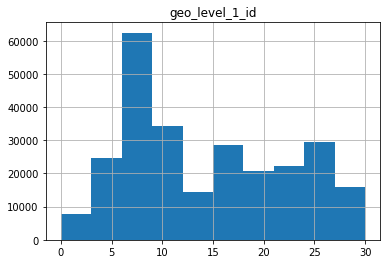

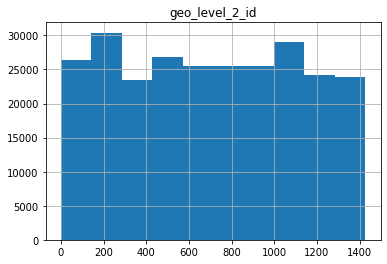

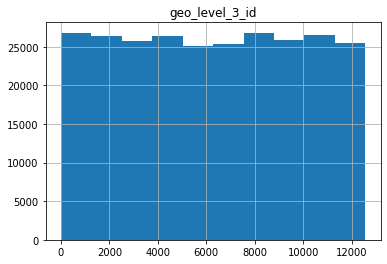

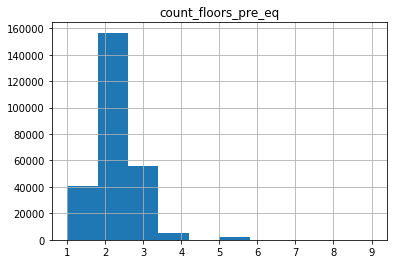

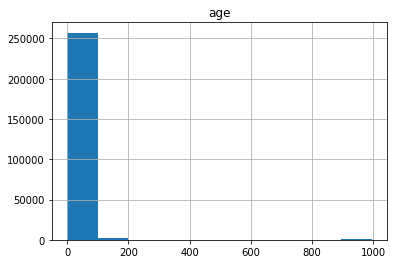

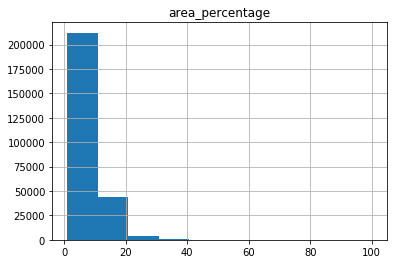

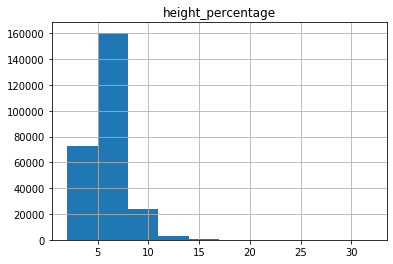

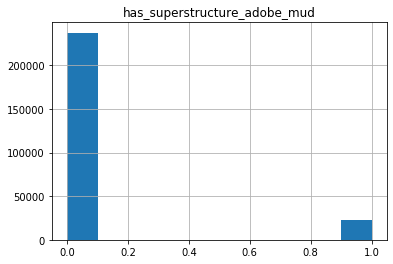

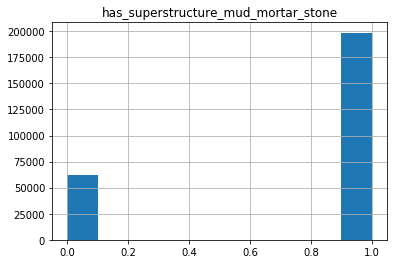

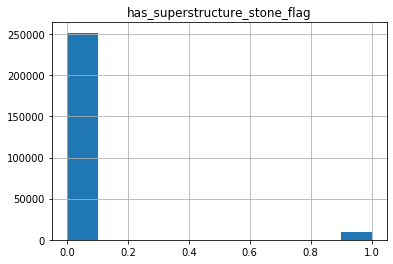

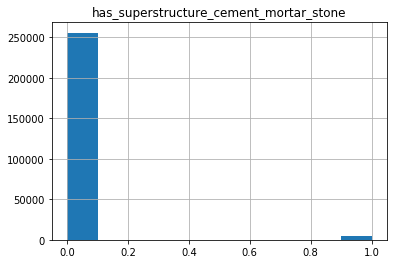

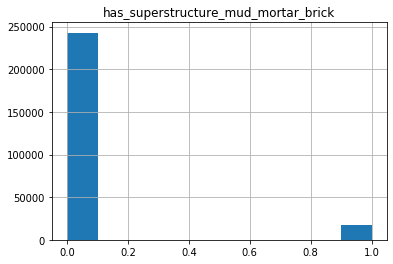

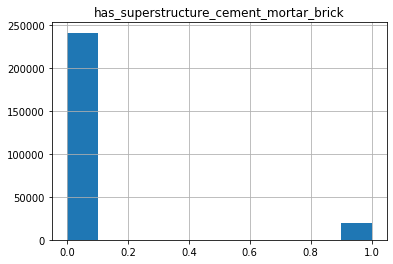

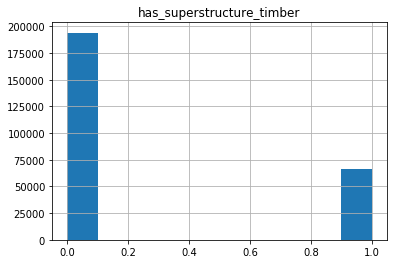

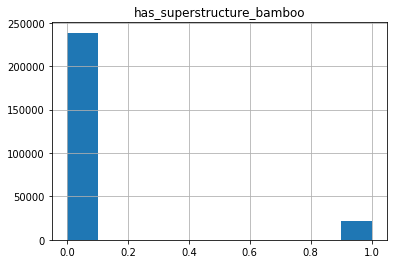

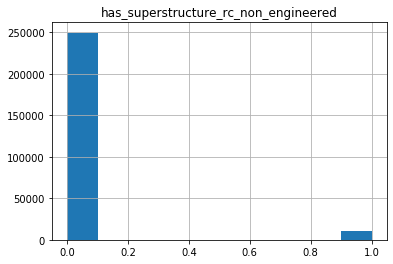

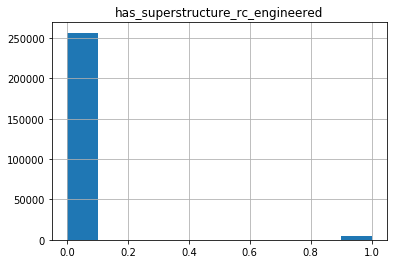

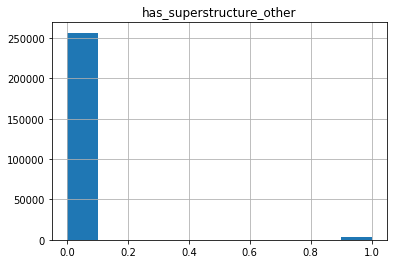

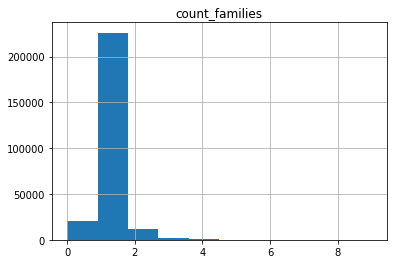

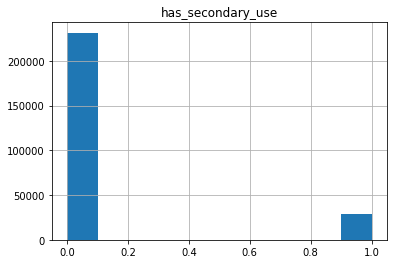

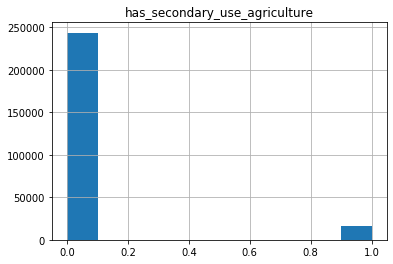

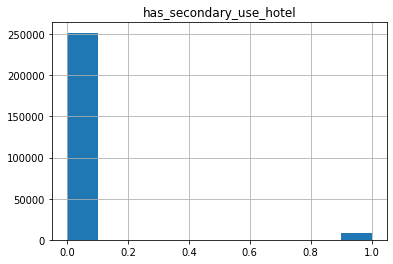

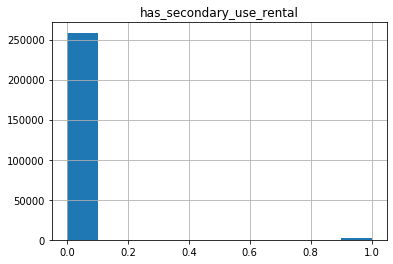

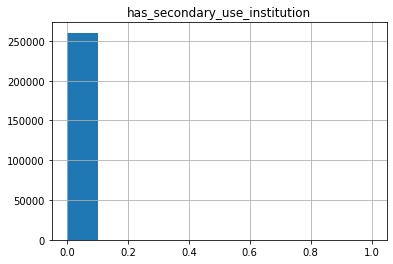

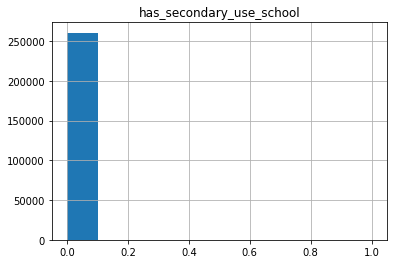

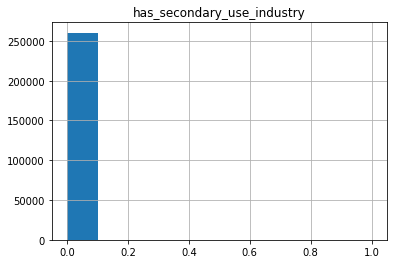

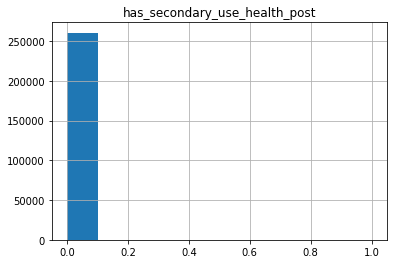

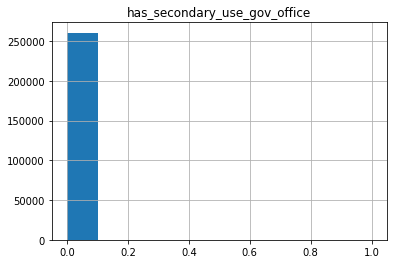

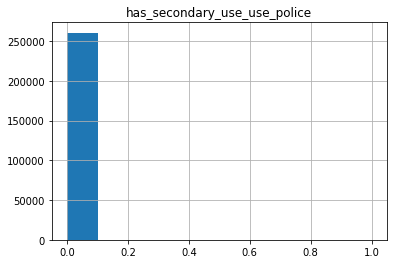

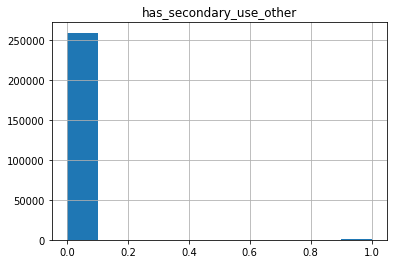

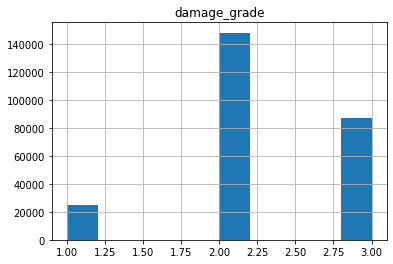

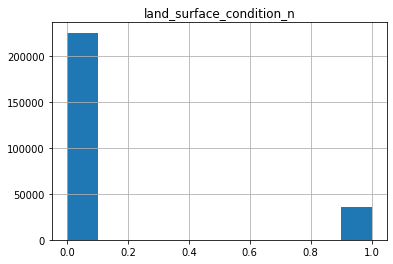

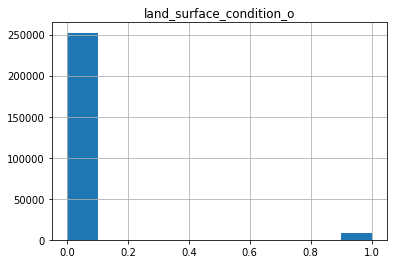

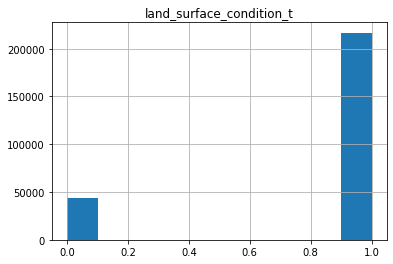

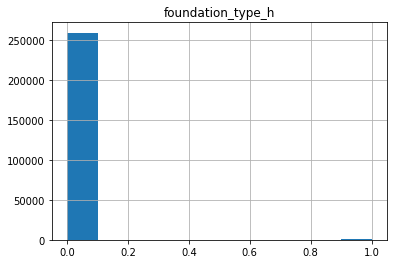

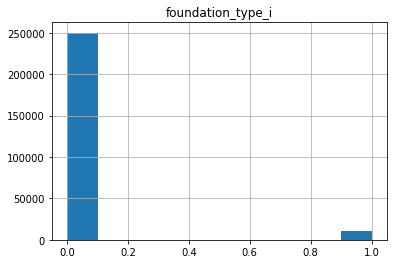

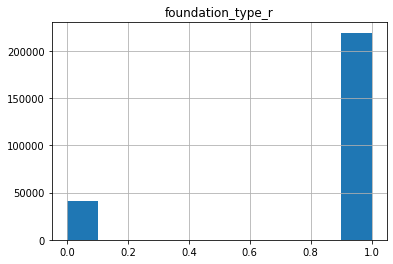

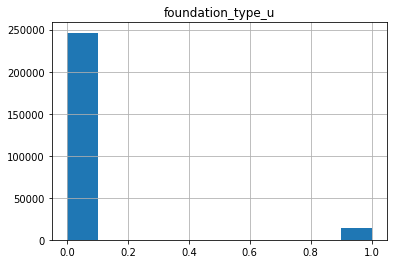

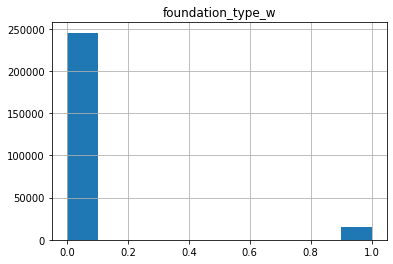

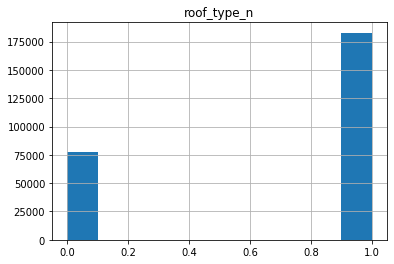

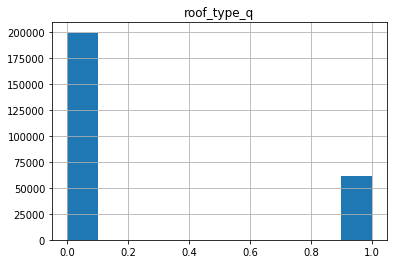

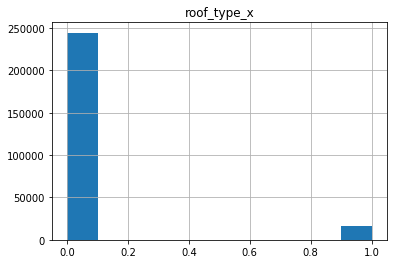

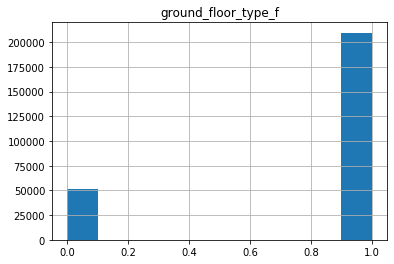

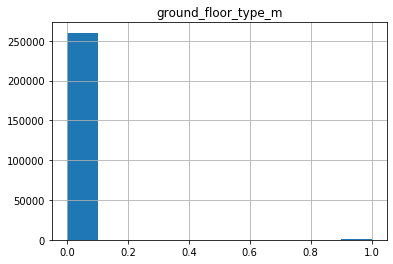

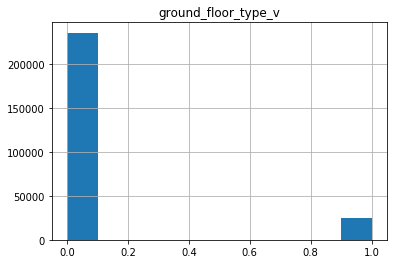

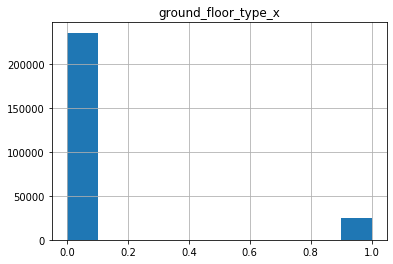

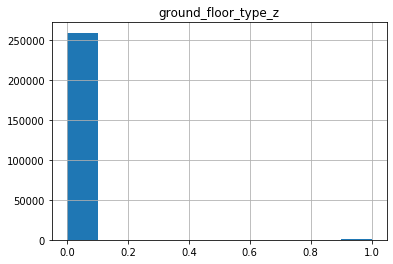

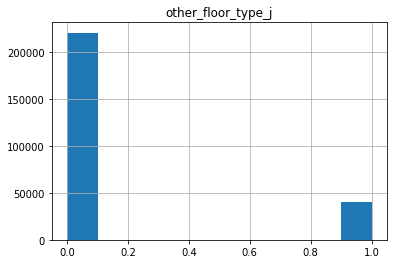

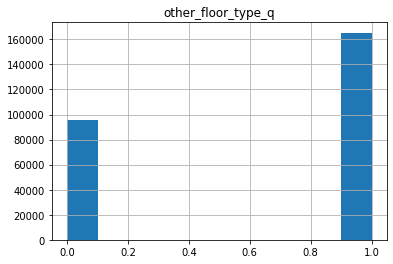

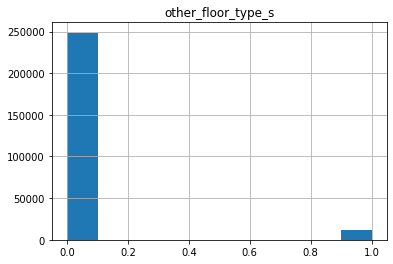

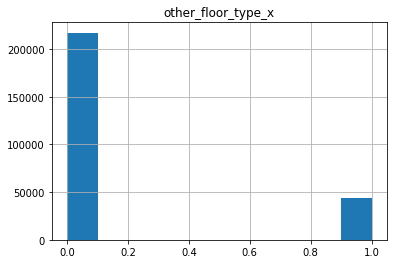

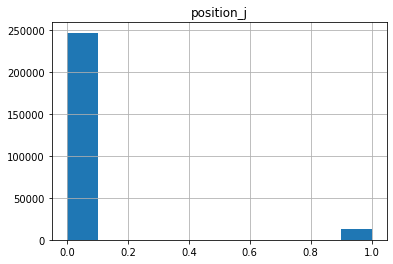

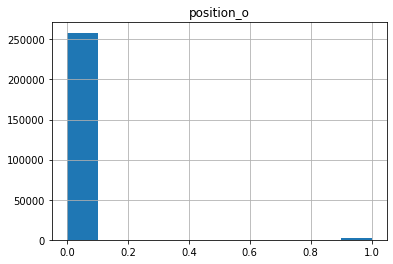

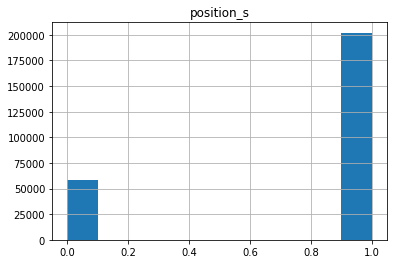

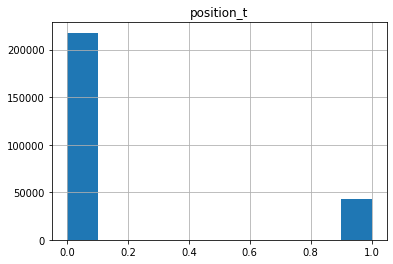

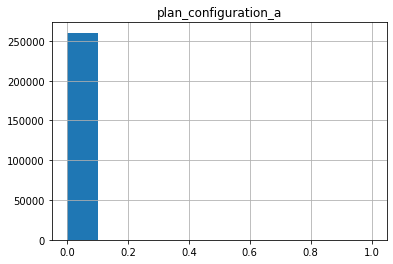

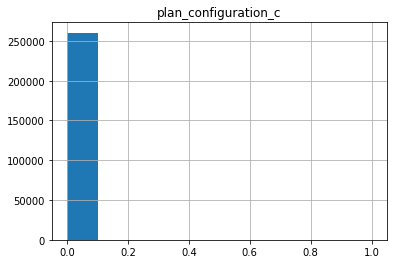

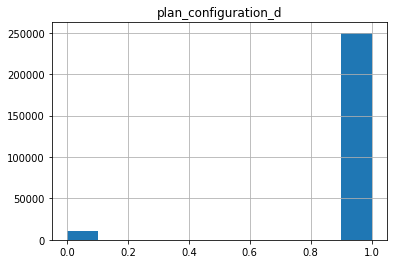

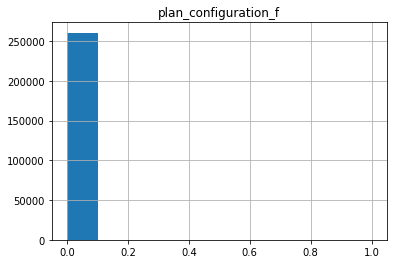

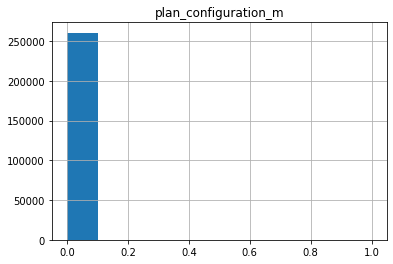

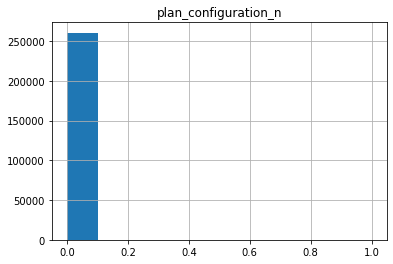

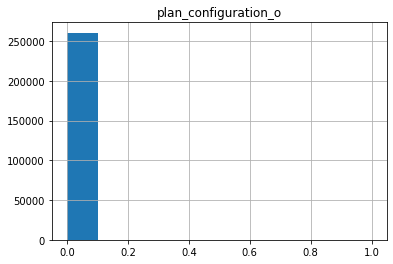

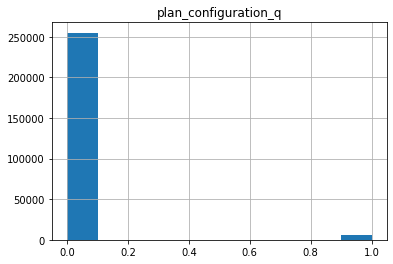

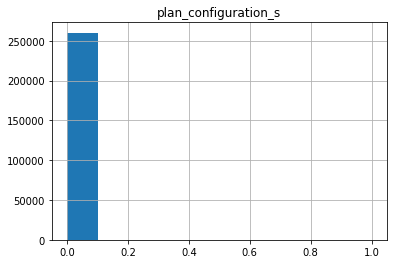

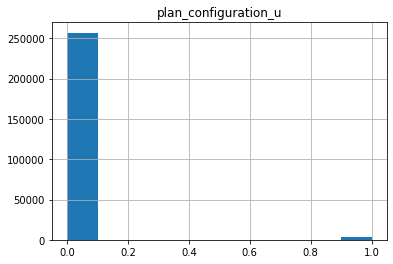

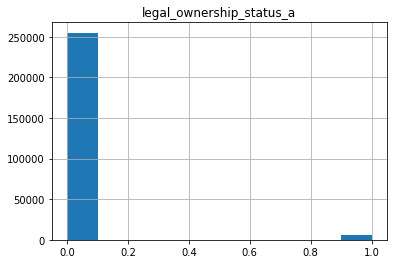

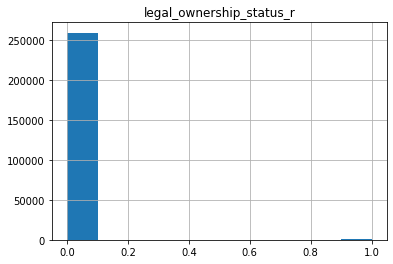

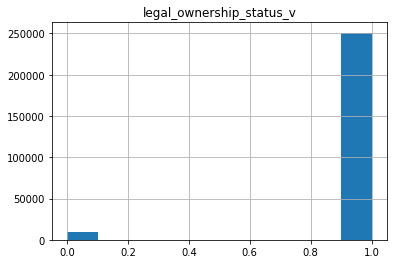

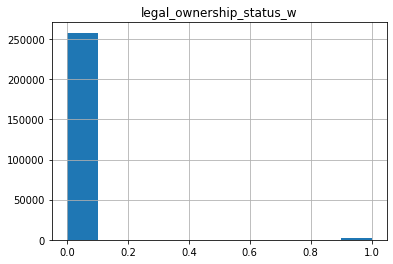

In [87]:
for col in train.columns:
  hist = train.hist(bins=10, column=col)

En muchas variables, como en **damage_grade**, se observa que la muestra no está balanceada, sin tener en cuenta las dummies.

In [59]:
# TODO Change string categorical to numeric categorical
# Now we exclude string categorical variables
#train = train.select_dtypes(exclude=['object'])
#test = test_values.select_dtypes(exclude=['object'])
#train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [89]:
# TODO Drop all variables that are NANs
train = train.dropna()
test = test.dropna()
train.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.00000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272,0.136331,0.031911,0.831758,0.005556,0.040595,0.841117,0.054720,0.058012,0.701617,0.236285,0.062099,0.804368,0.001949,0.094370,0.09546,0.003853,0.152889,0.634234,0.046155,0.166722,0.050967,0.008952,0.775477,0.164604,0.000967,0.001247,0.959597,0.000084,0.000177,0.000146,0.000610,0.021842,0.001328,0.014002,0.021151,0.005652,0.962924,0.010272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814,0.343140,0.175763,0.374082,0.074334,0.197350,0.365567,0.227433,0.233767,0.457549,0.424800,0.241335,0.396687,0.044108,0.292344,0.29385,0.061950,0.359881,0.481645,0.209821,0.372728,0.219930,0.094193,0.417269,0.370824,0.031082,0.035293,0.196902,0.009188,0.013285,0.012075,0.024693,0.146167,0.036413,0.117500,0.143888,0.074969,0.188948,0.100831
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [0]:
#X = train.iloc[:, 0:38].values
#y = train.iloc[:, 38].values
X = train.iloc[:, 0:30].values
y = train.iloc[:, 30].values


In [0]:
# Partition train-test & scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [0]:
X.shape

(260601, 30)

In [0]:
y.shape

(260601,)

In [0]:
X_train.shape

(182420, 30)

In [0]:
X_test.shape

(78181, 30)

In [0]:
y_train.shape

(182420,)

In [0]:
y_test.shape

(78181,)

In [0]:
test = test.set_index("building_id")

In [0]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(train.iloc[:, 0:30], train.iloc[:, 30])
y_pred = classifier.predict(test)

In [92]:
y_pred.shape

(86868,)

In [0]:
f1_micro_score = f1_score(y_test, y_pred, average='macro')
print(f1_micro_score)

0.6450031290406181


In [0]:
test.reset_index(level=0, inplace=True)

In [0]:
output = pd.DataFrame({'building_id': test['building_id'], 
                       'damage_grade': y_pred})

timestamp = str(np.rint(datetime.timestamp(datetime.now())).astype(int))

path = "/content/" + timestamp + "_competition_result.csv"
output.to_csv(path_or_buf=path, index=False)